## Importing libraries

In [230]:
import pandas as pd
import numpy as np
import matplotlib as mp
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing csv files into Pandas Dataframe

In [93]:
Product_Sales=pd.read_csv('Product_Sales.csv')
Dayparts_Sales=pd.read_csv('Dayparts.csv')
Demographics_data=pd.read_csv('Demographics.csv')
Weather_Data=pd.read_csv('Weather.csv')

In [94]:
Product_Sales.head()

,Rest Owner,Rest Coop,REST_KEY,MITM_KEY,Menu Item,Menu Item Combo Meal Flag,Reporting Day,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold
0,SMITH JOE,SEA/TCA WA CP-0024,1364,1,00000001-REUBEN,N,1/1/2011,0.95,25,0,25,6
1,SMITH JOE,SEA/TCA WA CP-0024,5357,1,00000001-REUBEN,N,1/1/2011,0.95,10,0,10,1
2,SMITH JOE,SEA/TCA WA CP-0024,13369,1,00000001-REUBEN,N,1/1/2011,0.95,9,0,9,3
3,SMITH JOE,SEA/TCA WA CP-0024,13604,1,00000001-REUBEN,N,1/1/2011,0.95,24,0,24,4
4,SMITH JOE,SEA/TCA WA CP-0024,1364,1,00000001-REUBEN,N,1/2/2011,0.95,28,0,28,4


### Getting details on the data frame- columns, count, datatype

In [95]:
Product_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rest Owner                               6516 non-null   object 
 1   Rest Coop                                6516 non-null   object 
 2   REST_KEY                                 6516 non-null   int64  
 3   MITM_KEY                                 6516 non-null   int64  
 4   Menu Item                                6516 non-null   object 
 5   Menu Item Combo Meal Flag                6516 non-null   object 
 6   Reporting Day                            6516 non-null   object 
 7   POS Consumer Price                       6502 non-null   float64
 8   POS Total Units Sold  Promo and Regular  6516 non-null   int64  
 9   POS Promotion Units Sold                 6516 non-null   int64  
 10  POS Units Sold                           6516 no

### Dropping columns Rest Owner, Rest Coop

In [96]:
Product_Sales.drop(['Rest Owner', 'Rest Coop'], axis=1, inplace=True)

In [97]:
Product_Sales.head()

,REST_KEY,MITM_KEY,Menu Item,Menu Item Combo Meal Flag,Reporting Day,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold
0,1364,1,00000001-REUBEN,N,1/1/2011,0.95,25,0,25,6
1,5357,1,00000001-REUBEN,N,1/1/2011,0.95,10,0,10,1
2,13369,1,00000001-REUBEN,N,1/1/2011,0.95,9,0,9,3
3,13604,1,00000001-REUBEN,N,1/1/2011,0.95,24,0,24,4
4,1364,1,00000001-REUBEN,N,1/2/2011,0.95,28,0,28,4


### Converting datatypes of columns 
Changing non-numeric columns REST_KEY, MITM_KEY to object.
Changing datatype of column 'Reporting Day' to Date_time

In [98]:
Product_Sales['REST_KEY']=Product_Sales['REST_KEY'].astype('object')
Product_Sales['MITM_KEY']=Product_Sales['MITM_KEY'].astype('object')

In [99]:
Product_Sales['Reporting Day']=pd.to_datetime(Product_Sales['Reporting Day'])

In [100]:
Product_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REST_KEY                                 6516 non-null   object        
 1   MITM_KEY                                 6516 non-null   object        
 2   Menu Item                                6516 non-null   object        
 3   Menu Item Combo Meal Flag                6516 non-null   object        
 4   Reporting Day                            6516 non-null   datetime64[ns]
 5   POS Consumer Price                       6502 non-null   float64       
 6   POS Total Units Sold  Promo and Regular  6516 non-null   int64         
 7   POS Promotion Units Sold                 6516 non-null   int64         
 8   POS Units Sold                           6516 non-null   int64         
 9   POS Combo Units Sold                     

### Statistical summary using describe()

In [101]:
Product_Sales.describe()

,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold
count,6502.000000,6516.000000,6516.000000,6516.000000,6516.000000
mean,2.249880,28.884131,0.085635,28.798496,11.891498
std,1.122516,36.930998,0.600871,36.901134,23.363182
min,0.250000,1.000000,0.000000,0.000000,0.000000
25%,1.190000,3.000000,0.000000,3.000000,0.000000
50%,2.590000,14.000000,0.000000,13.000000,1.000000
75%,3.190000,40.000000,0.000000,40.000000,12.000000
max,6.290000,217.000000,27.000000,217.000000,202.000000


### Replacing Nan values for POS Consumer Price based on Item Key and price that are already present for the Item

In [102]:
Price_Per_Item= Product_Sales[['MITM_KEY','POS Consumer Price']]
Price_Per_Item=Price_per_Item.drop_duplicates(subset=['MITM_KEY'], keep='last')

### Joining Product_Sales Data frame and Price_Per_Item Data frame to fill Nan values for POS Consumer Proce column

In [103]:
Joined_Df=pd.merge(Product_Sales,Price_Per_Item,
                    how="inner",
                    on='MITM_KEY')
Joined_Df.head()

,REST_KEY,MITM_KEY,Menu Item,Menu Item Combo Meal Flag,Reporting Day,POS Consumer Price_x,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold,POS Consumer Price_y
0,1364,1,00000001-REUBEN,N,2011-01-01,0.95,25,0,25,6,0.95
1,5357,1,00000001-REUBEN,N,2011-01-01,0.95,10,0,10,1,0.95
2,13369,1,00000001-REUBEN,N,2011-01-01,0.95,9,0,9,3,0.95
3,13604,1,00000001-REUBEN,N,2011-01-01,0.95,24,0,24,4,0.95
4,1364,1,00000001-REUBEN,N,2011-01-02,0.95,28,0,28,4,0.95


In [104]:
Joined_Df[Joined_Df['POS Consumer Price_x'].isna()]

,REST_KEY,MITM_KEY,Menu Item,Menu Item Combo Meal Flag,Reporting Day,POS Consumer Price_x,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold,POS Consumer Price_y
254,5357,2,00000002-DOUBLE REUBEN,N,2011-01-24,NaN,1,1,0,0,1.00
2257,13369,33,00000033-SAUSAGE,N,2011-01-23,NaN,1,1,0,0,1.19
2259,5357,33,00000033-SAUSAGE,N,2011-01-24,NaN,1,1,0,0,1.19
4470,13369,81,00000081-SML DECAF COFFEE,N,2011-01-03,NaN,2,2,0,0,1.44
5689,5357,111,00000111-SML CARAMEL MOCHA,N,2011-01-25,NaN,1,1,0,0,2.35
5752,1364,113,00000113-MED CARAMEL MOCHA,N,2011-01-11,NaN,1,1,0,0,3.05
5809,13604,113,00000113-MED CARAMEL MOCHA,N,2011-01-27,NaN,2,2,0,0,3.05
5916,1364,121,00000121-SML N-FAT CRML MOCHA,N,2011-01-14,NaN,1,1,0,0,2.35
5953,5357,127,00000127-MED N-FAT CRML MOCHA,N,2011-01-08,NaN,1,1,0,0,3.05
5965,1364,127,00000127-MED N-FAT CRML MOCHA,N,2011-01-16,NaN,2,2,0,0,3.05


In [105]:
Joined_Df['POS Consumer Price_x']=Joined_Df['POS Consumer Price_x'].fillna(Joined_Df['POS Consumer Price_y'])
Joined_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6516 entries, 0 to 6515
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REST_KEY                                 6516 non-null   object        
 1   MITM_KEY                                 6516 non-null   object        
 2   Menu Item                                6516 non-null   object        
 3   Menu Item Combo Meal Flag                6516 non-null   object        
 4   Reporting Day                            6516 non-null   datetime64[ns]
 5   POS Consumer Price_x                     6516 non-null   float64       
 6   POS Total Units Sold  Promo and Regular  6516 non-null   int64         
 7   POS Promotion Units Sold                 6516 non-null   int64         
 8   POS Units Sold                           6516 non-null   int64         
 9   POS Combo Units Sold                     

In [200]:
Product_Sales_Final=Joined_Df.rename(columns= {'POS Consumer Price_x': 'POS Consumer Price' })
Product_Sales_Final.drop('POS Consumer Price_y', axis=1, inplace= True)
Product_Sales_Final

,REST_KEY,MITM_KEY,Menu Item,Menu Item Combo Meal Flag,Reporting Day,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold
0,1364,1,00000001-REUBEN,N,2011-01-01,0.95,25,0,25,6
1,5357,1,00000001-REUBEN,N,2011-01-01,0.95,10,0,10,1
2,13369,1,00000001-REUBEN,N,2011-01-01,0.95,9,0,9,3
3,13604,1,00000001-REUBEN,N,2011-01-01,0.95,24,0,24,4
4,1364,1,00000001-REUBEN,N,2011-01-02,0.95,28,0,28,4
...,...,...,...,...,...,...,...,...,...,...
6511,13369,134,00000134-SML ICED CRML MOCHA,N,2011-01-24,2.35,2,0,2,0
6512,13369,134,00000134-SML ICED CRML MOCHA,N,2011-01-25,2.35,1,0,1,0
6513,5357,134,00000134-SML ICED CRML MOCHA,N,2011-01-27,2.35,1,0,1,0
6514,13369,134,00000134-SML ICED CRML MOCHA,N,2011-01-29,2.35,2,0,2,0


In [204]:
Product_Sales_Final['Menu Item']=Product_Sales_Final['Menu Item'].replace('[0-9,-]', '', regex=True)

In [207]:
Product_Sales_Final.head()

,REST_KEY,MITM_KEY,Menu Item,Menu Item Combo Meal Flag,Reporting Day,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold
0,1364,1,REUBEN,N,2011-01-01,0.95,25,0,25,6
1,5357,1,REUBEN,N,2011-01-01,0.95,10,0,10,1
2,13369,1,REUBEN,N,2011-01-01,0.95,9,0,9,3
3,13604,1,REUBEN,N,2011-01-01,0.95,24,0,24,4
4,1364,1,REUBEN,N,2011-01-02,0.95,28,0,28,4


### Adding a column for Sales_PerItem_PerStore_PerDay=POS Total Units Sold * POS Consumer Price

In [209]:
Product_Sales_Final['Sales_PerItem_PerStore_PerDay']=Product_Sales_Final['POS Total Units Sold  Promo and Regular'].astype('float')*Product_Sales_Final['POS Consumer Price']
Product_Sales_Final.columns.str.strip()

Index(['REST_KEY', 'MITM_KEY', 'Menu Item', 'Menu Item Combo Meal Flag',
       'Reporting Day', 'POS Consumer Price',
       'POS Total Units Sold  Promo and Regular', 'POS Promotion Units Sold',
       'POS Units Sold', 'POS Combo Units Sold',
       'Sales_PerItem_PerStore_PerDay'],
      dtype='object')

In [210]:
Product_Sales_Final.head()

,REST_KEY,MITM_KEY,Menu Item,Menu Item Combo Meal Flag,Reporting Day,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold,Sales_PerItem_PerStore_PerDay
0,1364,1,REUBEN,N,2011-01-01,0.95,25,0,25,6,23.75
1,5357,1,REUBEN,N,2011-01-01,0.95,10,0,10,1,9.50
2,13369,1,REUBEN,N,2011-01-01,0.95,9,0,9,3,8.55
3,13604,1,REUBEN,N,2011-01-01,0.95,24,0,24,4,22.80
4,1364,1,REUBEN,N,2011-01-02,0.95,28,0,28,4,26.60


In [211]:
Product_Sales_Final.to_csv('Product_Sales_Final.csv')

### Graphing total Sales by restaurant

In [186]:
SaleByRestaurant=Product_Sales_Final.groupby(['REST_KEY']).sum()
SaleByRestaurant

,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold,Sales_PerItem_PerStore_PerDay
REST_KEY,,,,,,
1364,3768.41,49713,159,49554,19707,96856.74
5357,3675.81,53140,144,52996,22849,101116.36
13369,3576.53,42023,84,41939,17259,83103.29
13604,3641.89,43333,171,43162,17670,85243.02


In [187]:
SaleByRestaurant.reset_index(inplace=True)
SaleByRestaurant

,REST_KEY,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold,Sales_PerItem_PerStore_PerDay
0,1364,3768.41,49713,159,49554,19707,96856.74
1,5357,3675.81,53140,144,52996,22849,101116.36
2,13369,3576.53,42023,84,41939,17259,83103.29
3,13604,3641.89,43333,171,43162,17670,85243.02


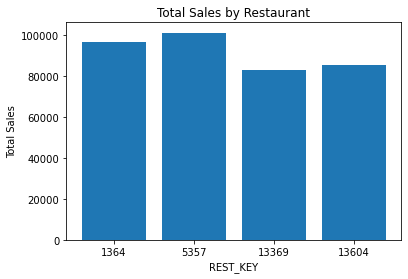

In [188]:
x=SaleByRestaurant['REST_KEY'].astype('string')
y=SaleByRestaurant['Sales_PerItem_PerStore_PerDay']
plt.bar(x,y)
plt.xlabel('REST_KEY')
plt.ylabel('Total Sales')
plt.title('Total Sales by Restaurant')
plt.show()

In [192]:
SaleByProduct=Product_Sales_Final.groupby(['MITM_KEY']).sum()
SaleByProduct.reset_index(inplace=True)

In [193]:
SaleByProduct

,MITM_KEY,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold,Sales_PerItem_PerStore_PerDay
0,1,233.70,6111,6,6105,1115,5805.45
1,2,18.48,27,1,26,0,33.38
2,3,245.29,30045,9,30036,10480,29926.78
3,4,329.96,18504,6,18498,4755,24856.15
4,5,912.30,14284,67,14217,10571,52933.32
5,7,936.90,16104,38,16066,13848,61192.69
6,24,325.38,9124,80,9044,0,11894.89
7,30,192.78,355,0,355,0,422.45
8,31,577.57,830,2,828,0,2149.70
9,32,750.12,931,0,931,0,3062.99


### Data Wrangling- DayParts csv

In [212]:
Dayparts_Sales.head()

,REST_KEY,Rest Coop,Reporting Day,Daypart Name,Daypart Description,Daypart Sales $,Daypart Transaction Qty
0,1364,SEA/TCA WA CP-0024,1/2/2010,After 4PM,4PM - Close,1529.84,235
1,1364,SEA/TCA WA CP-0024,1/2/2010,Afternoon,2PM - 4PM,539.20,75
2,1364,SEA/TCA WA CP-0024,1/2/2010,Breakfast,Open - 10:30AM (11AM weekend),1027.40,180
3,1364,SEA/TCA WA CP-0024,1/2/2010,Dinner,4PM - 9PM,957.24,156
4,1364,SEA/TCA WA CP-0024,1/2/2010,Evening,9PM - Close,572.60,79


In [213]:
Dayparts_Sales.drop(['Rest Coop'],axis=1, inplace=True)

In [242]:
Dayparts_Sales.head()

,REST_KEY,Reporting Day,Daypart Name,Daypart Description,Daypart Sales $,Daypart Transaction Qty
0,1364,1/2/2010,After 4PM,4PM - Close,1529.84,235
1,1364,1/2/2010,Afternoon,2PM - 4PM,539.20,75
2,1364,1/2/2010,Breakfast,Open - 10:30AM (11AM weekend),1027.40,180
3,1364,1/2/2010,Dinner,4PM - 9PM,957.24,156
4,1364,1/2/2010,Evening,9PM - Close,572.60,79


In [225]:
Demographics_data

1,1364,2/26/1970,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,9.2,9.67,13.66,"9,080",0%,...,21%,1%,2%,Soc-C2,Life-Y2,"13,055",0%,0%,100%,0%
2,5357,2/6/1980,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,9.24,11.34,42.83,"1,281",10%,...,6%,17%,0%,Soc-S3,Life-Y1,"10,213",13%,87%,0%,0%
3,13369,11/3/1995,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,8.91,22.72,19.63,"3,108",0%,...,11%,16%,0%,Soc-S4,Life-F3,"5,748",0%,93%,7%,0%
4,13604,3/8/1996,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,3.2,6.28,6.89,"9,219",0%,...,13%,0%,0%,Soc-C1,Life-Y1,"5,652",0%,7%,93%,0%


### Cleaning Demographics csv

In [227]:
Demographics_data=pd.read_csv('Demographics.csv')

In [228]:
Demographics_data.columns = Demographics_data.iloc[0]
Demographics_data = Demographics_data[1:]
Demographics_data

,REST_KEY,REST_OPN_DT,REST_CLS_DT,REST_MNT_ADV_COOP,REST_RGN,afr_amr_cons,hisp_cons,asian_cons,HOUSEHLDSC,Soc-U1,...,Life-M2,Life-M3,Life-M4,Prom Soc,Prom Life,Row,PNECY_URB,PNECY_SUB,PNECY_CITY,PNECY_TR
1,1364,2/26/1970,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,9.2,9.67,13.66,"9,080",0%,...,21%,1%,2%,Soc-C2,Life-Y2,"13,055",0%,0%,100%,0%
2,5357,2/6/1980,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,9.24,11.34,42.83,"1,281",10%,...,6%,17%,0%,Soc-S3,Life-Y1,"10,213",13%,87%,0%,0%
3,13369,11/3/1995,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,8.91,22.72,19.63,"3,108",0%,...,11%,16%,0%,Soc-S4,Life-F3,"5,748",0%,93%,7%,0%
4,13604,3/8/1996,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,3.2,6.28,6.89,"9,219",0%,...,13%,0%,0%,Soc-C1,Life-Y1,"5,652",0%,7%,93%,0%


In [229]:
Demographics_data.to_csv('Demographics_data.csv')

### Cleaning Weather.csv

In [231]:
Weather_Data=pd.read_csv('Weather.csv')

In [233]:
Weather_Data.drop(['xFilter','xError',], axis=1, inplace=True)

In [244]:
Weather_Data.columns.str.strip()

Index(['TY_DATE', 'LY_DATE', 'TY_AVG_MIN_TEMP', 'TY_AVG_MAX_TEMP',
       'TY_TOTAL_PRECIP', 'TY_TOTAL_SNOW', 'LY_AVG_MIN_TEMP',
       'LY_AVG_MAX_TEMP', 'LY_TOTAL_PRECIP', 'LY_TOTAL_SNOW',
       'NRM_AVG_MIN_TEMP', 'NRM_AVG_MAX_TEMP', 'NRM_TOTAL_PRECIP',
       'NRM_TOTAL_SNOW'],
      dtype='object')

In [239]:
Weather_Data=Weather_Data[['TY_DATE','LY_DATE',
                          'TY_AVG_MIN_TEMP','TY_AVG_MAX_TEMP','TY_TOTAL_PRECIP','TY_TOTAL_SNOW',
                          'LY_AVG_MIN_TEMP','LY_AVG_MAX_TEMP','LY_TOTAL_PRECIP','LY_TOTAL_SNOW',
                          'NRM_AVG_MIN_TEMP','NRM_AVG_MAX_TEMP','NRM_TOTAL_PRECIP','NRM_TOTAL_SNOW'
                         ]]

In [241]:
Weather_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TY_DATE           31 non-null     object 
 1   LY_DATE           31 non-null     object 
 2   TY_AVG_MIN_TEMP   31 non-null     float64
 3   TY_AVG_MAX_TEMP   31 non-null     float64
 4   TY_TOTAL_PRECIP   31 non-null     float64
 5   TY_TOTAL_SNOW     31 non-null     float64
 6   LY_AVG_MIN_TEMP   31 non-null     float64
 7   LY_AVG_MAX_TEMP   31 non-null     float64
 8   LY_TOTAL_PRECIP   31 non-null     float64
 9   LY_TOTAL_SNOW     31 non-null     float64
 10  NRM_AVG_MIN_TEMP  31 non-null     float64
 11  NRM_AVG_MAX_TEMP  31 non-null     float64
 12  NRM_TOTAL_PRECIP  31 non-null     float64
 13  NRM_TOTAL_SNOW    31 non-null     float64
dtypes: float64(12), object(2)
memory usage: 3.5+ KB


In [249]:
#Converting datatype of TY_Date and LY_Date to datetime
Weather_Data['TY_DATE']=pd.to_datetime(Weather_Data['TY_DATE'])

In [250]:
Weather_Data['LY_DATE']=pd.to_datetime(Weather_Data['LY_DATE'])

In [248]:
Weather_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TY_DATE           31 non-null     datetime64[ns]
 1   LY_DATE           31 non-null     datetime64[ns]
 2   TY_AVG_MIN_TEMP   31 non-null     float64       
 3   TY_AVG_MAX_TEMP   31 non-null     float64       
 4   TY_TOTAL_PRECIP   31 non-null     float64       
 5   TY_TOTAL_SNOW     31 non-null     float64       
 6   LY_AVG_MIN_TEMP   31 non-null     float64       
 7   LY_AVG_MAX_TEMP   31 non-null     float64       
 8   LY_TOTAL_PRECIP   31 non-null     float64       
 9   LY_TOTAL_SNOW     31 non-null     float64       
 10  NRM_AVG_MIN_TEMP  31 non-null     float64       
 11  NRM_AVG_MAX_TEMP  31 non-null     float64       
 12  NRM_TOTAL_PRECIP  31 non-null     float64       
 13  NRM_TOTAL_SNOW    31 non-null     float64       
dtypes: datetime64[ns](2), float6

In [254]:
Weather_Data.tail()

,TY_DATE,LY_DATE,TY_AVG_MIN_TEMP,TY_AVG_MAX_TEMP,TY_TOTAL_PRECIP,TY_TOTAL_SNOW,LY_AVG_MIN_TEMP,LY_AVG_MAX_TEMP,LY_TOTAL_PRECIP,LY_TOTAL_SNOW,NRM_AVG_MIN_TEMP,NRM_AVG_MAX_TEMP,NRM_TOTAL_PRECIP,NRM_TOTAL_SNOW
26,2011-01-27,2010-01-28,35.073220,50.337623,0.000000,0.009188,40.580623,52.598624,0.000000,0.0,33.725860,45.659975,0.165602,0.164596
27,2011-01-28,2010-01-29,36.798819,51.726780,0.119322,0.013097,42.613933,54.700716,0.026329,0.0,34.233417,46.388199,0.172276,0.164596
28,2011-01-29,2010-01-30,43.397027,48.385348,0.228041,0.011077,43.048747,48.660682,0.191854,0.0,36.234933,46.368065,0.170821,0.162576
29,2011-01-30,2010-01-31,35.993319,44.607528,0.026649,0.011077,44.234535,49.906199,0.089431,0.0,37.595393,48.207016,0.164061,0.162576
30,2011-01-31,2010-02-01,32.563220,43.488619,0.004028,0.011077,39.964016,48.764957,0.084612,0.0,37.076517,47.162334,0.160280,0.162576


In [ ]:
#Dropping February data
Weather_Data = Weather_Data[:29]

In [253]:
Weather_Data.to_csv('Weather_Data.csv')

In [255]:
#Joining Product sales and weather table
Pdt_Weather=pd.merge(Product_Sales_Final,Weather_Data,
                    how="inner",
                    left_on='Reporting Day', 
                    right_on='TY_DATE')

In [257]:
Pdt_Weather[['Reporting Day','TY_DATE']].head()

,Reporting Day,TY_DATE
0,2011-01-01,2011-01-01
1,2011-01-01,2011-01-01
2,2011-01-01,2011-01-01
3,2011-01-01,2011-01-01
4,2011-01-01,2011-01-01


In [258]:
Pdt_Weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6516 entries, 0 to 6515
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REST_KEY                                 6516 non-null   object        
 1   MITM_KEY                                 6516 non-null   object        
 2   Menu Item                                6516 non-null   object        
 3   Menu Item Combo Meal Flag                6516 non-null   object        
 4   Reporting Day                            6516 non-null   datetime64[ns]
 5   POS Consumer Price                       6516 non-null   float64       
 6   POS Total Units Sold  Promo and Regular  6516 non-null   int64         
 7   POS Promotion Units Sold                 6516 non-null   int64         
 8   POS Units Sold                           6516 non-null   int64         
 9   POS Combo Units Sold                     

In [259]:
Pdt_Weather.to_csv('Pdt_Weather.csv')

In [262]:
Dayparts_Sales['Reporting Day']=pd.to_datetime(Dayparts_Sales['Reporting Day'])

In [263]:
#Joinind DayParts and Weather table
DayPart_Weather=pd.merge(Dayparts_Sales,Weather_Data,
                    how="inner",
                    left_on='Reporting Day', 
                    right_on='TY_DATE')

In [264]:
DayPart_Weather.head()

,REST_KEY,Reporting Day,Daypart Name,Daypart Description,Daypart Sales $,Daypart Transaction Qty,TY_DATE,LY_DATE,TY_AVG_MIN_TEMP,TY_AVG_MAX_TEMP,TY_TOTAL_PRECIP,TY_TOTAL_SNOW,LY_AVG_MIN_TEMP,LY_AVG_MAX_TEMP,LY_TOTAL_PRECIP,LY_TOTAL_SNOW,NRM_AVG_MIN_TEMP,NRM_AVG_MAX_TEMP,NRM_TOTAL_PRECIP,NRM_TOTAL_SNOW
0,1364,2011-01-01,After 4PM,4PM - Close,1627.39,248,2011-01-01,2010-01-02,22.120858,39.373794,0.0,0.01251,43.697699,48.252531,0.164265,0.0,37.450811,47.341834,0.161188,0.164009
1,1364,2011-01-01,Afternoon,2PM - 4PM,736.38,103,2011-01-01,2010-01-02,22.120858,39.373794,0.0,0.01251,43.697699,48.252531,0.164265,0.0,37.450811,47.341834,0.161188,0.164009
2,1364,2011-01-01,Breakfast,Open - 10:30AM (11AM weekend),646.95,104,2011-01-01,2010-01-02,22.120858,39.373794,0.0,0.01251,43.697699,48.252531,0.164265,0.0,37.450811,47.341834,0.161188,0.164009
3,1364,2011-01-01,Dinner,4PM - 9PM,1375.57,207,2011-01-01,2010-01-02,22.120858,39.373794,0.0,0.01251,43.697699,48.252531,0.164265,0.0,37.450811,47.341834,0.161188,0.164009
4,1364,2011-01-01,Evening,9PM - Close,251.82,41,2011-01-01,2010-01-02,22.120858,39.373794,0.0,0.01251,43.697699,48.252531,0.164265,0.0,37.450811,47.341834,0.161188,0.164009


In [266]:
DayPart_Weather.to_csv('DayPart_Weather.csv')